# Desafio 5 - Métricas

## Modelagem Preditiva em Dados Financeiros com Balanceamento

### Introdução:

Neste desaﬁo, propomos a criação de um modelo preditivo utilizando um conjunto de dados ﬁnanceiros.

A particularidade desse desaﬁo está na necessidade de lidar com classes desbalanceadas, o que é comum em cenários ﬁnanceiros.

O objetivo principal é construir um modelo capaz de prever se um empréstimo será totalmente pago ou resultará em inadimplência,

enquanto abordamos o desaﬁo inerente da distribuição desigual entre as classes.

### Conjunto de Dados:

O conjunto de dados fornecido contém informações relevantes, como detalhes do empregador, informações ﬁnanceiras, histórico de pagamentos, e outros atributos pertinentes.

No entanto, uma análise inicial revela que as classes estão desbalanceadas, com uma classe dominante e outras sub-representadas.

### Parte 1

Lidaremos com o desaﬁo do desequilíbrio de classes, uma vez que a classe "Totalmente Pago" é mais prevalente do que as classes relacionadas à inadimplência.

As classes que descrevem o empréstimo estão na coluna loan_status, e podem ser:
- 0: Inadimplente
- 1: Pago
- 2: Em processo de pagamento

Portanto deve-se utilizar um algoritmo de aprendizado de máquina, para construir o modelo preditivo. E avaliar suas métricas de precisão,

tanto em um treinamento com os dados desbalanceados, como depois de realizar um balanceamento e comparar

### Parte 2 - Desaﬁo de Modelagem Preditiva em Câncer de mama

Assim como no desaﬁo anterior este dataset necessita de balanceamento, a coluna de categorias a se utilizar deve ser a "status".

## Importando as bibliotecas

In [1]:
# https://www.youtube.com/watch?v=fcRRR4rbESo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.utils import resample

from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Parte 1 - Implementação

### Importando o dataset e salvando um uma variável

In [2]:
file_path = "./datasets/raw/loans.csv"
df_loans_raw = pd.read_csv(file_path, sep = ",")
df_loans_raw.sample(10)

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,...,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric
51304,2017-06-012014-10-01,E5B5,36 months 36 months,RENTOWN,1365.0,32.0,1.0,70.3,175000.0,38.79,...,FLNY,ff,1373.0,7996.0,140141258.0,17.0,15.0,0.0,425952.0,0
10961,2016-09-012014-03-01,B2B1,36 months 36 months,MORTGAGERENT,1445.0,42.0,0.0,80.1,135000.0,19.16,...,MDNV,wf,1453.0,9828.0,101584578.0,17.0,22.0,2.0,836265.6,2
43397,2017-04-012014-09-01,C5D4,36 months 60 months,MORTGAGERENT,1380.0,45.0,0.0,141.6,190000.0,33.56,...,MANY,fw,1388.0,74456.0,130251347.0,33.0,11.0,1.0,1272931.2,1
56427,2017-08-012014-11-01,A3D1,36 months 36 months,RENTMORTGAGE,1400.0,58.0,0.0,90.3,390000.0,22.80,...,CACA,wf,1408.0,28839.0,152316869.0,21.0,16.0,2.0,820713.6,2
1730,2016-07-012014-01-01,E2A5,60 months 36 months,OWNMORTGAGE,1330.0,44.0,0.0,48.8,135000.0,32.89,...,TXMA,wf,1338.0,7763.0,95002030.0,24.0,6.0,1.0,549763.2,1
74205,2018-02-012015-02-01,D4C1,36 months 36 months,MORTGAGERENT,1335.0,91.0,2.0,161.4,362000.0,32.29,...,LAIN,wf,1343.0,30751.0,168734388.0,30.0,15.0,2.0,1670112.0,2
28017,2016-12-012014-06-01,D4A2,36 months 36 months,RENTMORTGAGE,1440.0,42.0,0.0,65.1,175000.0,26.48,...,MIIN,wf,1448.0,25793.0,112647676.0,23.0,2.0,2.0,641692.8,2
58173,2017-08-012014-11-01,B4D1,36 months 60 months,MORTGAGEMORTGAGE,1455.0,87.0,0.0,113.5,112000.0,26.52,...,NYOK,fw,1463.0,14350.0,148029767.0,23.0,13.0,2.0,1001980.8,2
90079,2017-12-012015-04-01,D2D2,60 months 60 months,RENTRENT,1365.0,54.0,0.0,180.4,175000.0,34.61,...,TXAR,ww,1373.0,65277.0,168064646.0,22.0,2.0,2.0,851990.4,2
7475,2016-08-012014-02-01,E1C5,60 months 36 months,RENTRENT,1385.0,26.0,1.0,107.8,113000.0,38.00,...,PANY,ww,1393.0,26801.0,97997062.0,17.0,14.0,1.0,612835.2,1


### Verificandos os tipos de dados das colunas

In [3]:
df_loans_raw.dtypes

issue_d                      object
sub_grade                    object
term                         object
home_ownership               object
fico_range_low              float64
total_acc                   float64
pub_rec                     float64
revol_util                  float64
annual_inc                  float64
int_rate                    float64
dti                         float64
purpose                      object
mort_acc                    float64
loan_amnt                   float64
application_type             object
installment                 float64
verification_status          object
pub_rec_bankruptcies        float64
addr_state                   object
initial_list_status          object
fico_range_high             float64
revol_bal                   float64
id                          float64
open_acc                    float64
emp_length                  float64
loan_status                 float64
time_to_earliest_cr_line    float64
loan_status_numeric         

### Verificando valores faltantes e nulos

In [4]:
df_loans_raw.isna().sum()

issue_d                     0
sub_grade                   0
term                        0
home_ownership              0
fico_range_low              0
total_acc                   0
pub_rec                     0
revol_util                  0
annual_inc                  0
int_rate                    0
dti                         0
purpose                     0
mort_acc                    0
loan_amnt                   0
application_type            0
installment                 0
verification_status         0
pub_rec_bankruptcies        0
addr_state                  0
initial_list_status         0
fico_range_high             0
revol_bal                   0
id                          0
open_acc                    0
emp_length                  0
loan_status                 0
time_to_earliest_cr_line    0
loan_status_numeric         0
dtype: int64

### Análise Exploratória de Dados

#### Formato numérico

##### Colunas categóricas

In [5]:
print(df_loans_raw["issue_d"].unique(), "\nTamanho:", len(df_loans_raw["issue_d"].unique()), "\n")
print(df_loans_raw["sub_grade"].unique(), "\nTamanho:", len(df_loans_raw["sub_grade"].unique()), "\n")

print(df_loans_raw["term"].unique(), "\nTamanho:", len(df_loans_raw["term"].unique()), "\n")
print(df_loans_raw["home_ownership"].unique(), "\nTamanho:", len(df_loans_raw["home_ownership"].unique()))

print(df_loans_raw["purpose"].unique(), "\nTamanho:", len(df_loans_raw["purpose"].unique()), "\n")
print(df_loans_raw["application_type"].unique(), "\nTamanho:", len(df_loans_raw["application_type"].unique()), "\n")

print(df_loans_raw["verification_status"].unique(), "\nTamanho:", len(df_loans_raw["verification_status"].unique()), "\n")
print(df_loans_raw["addr_state"].unique(), "\nTamanho:", len(df_loans_raw["addr_state"].unique()))

print(df_loans_raw["initial_list_status"].unique(), "\nTamanho:", len(df_loans_raw["initial_list_status"].unique()))

['2016-07-012014-01-01' '2016-07-012014-02-01' '2016-08-012014-02-01'
 '2016-08-012014-03-01' '2016-09-012014-03-01' '2016-09-012014-04-01'
 '2016-10-012014-04-01' '2016-10-012014-05-01' '2016-11-012014-05-01'
 '2016-11-012014-06-01' '2016-12-012014-06-01' '2016-12-012014-07-01'
 '2017-01-012014-07-01' '2017-02-012014-07-01' '2017-02-012014-08-01'
 '2017-03-012014-08-01' '2017-04-012014-08-01' '2017-04-012014-09-01'
 '2017-04-012014-10-01' '2017-05-012014-10-01' '2017-06-012014-10-01'
 '2017-07-012014-10-01' '2017-07-012014-11-01' '2017-08-012014-11-01'
 '2017-09-012014-11-01' '2017-09-012014-12-01' '2017-10-012014-12-01'
 '2017-10-012015-01-01' '2017-11-012015-01-01' '2017-12-012015-01-01'
 '2018-01-012015-01-01' '2018-01-012015-02-01' '2018-02-012015-02-01'
 '2018-03-012015-02-01' '2018-04-012015-02-01' '2018-04-012015-03-01'
 '2018-05-012015-03-01' '2018-06-012015-03-01' '2018-07-012015-03-01'
 '2018-08-012015-03-01' '2018-08-012015-04-01' '2018-09-012015-04-01'
 '2018-10-012015-04-

##### Colunas numéricas

In [6]:
numeric_columns = df_loans_raw.select_dtypes(include = "number").columns

for curr_column in numeric_columns:
    print("Coluna:", curr_column)
    print("Valor mínimo:", df_loans_raw[curr_column].min())
    print("Valor máximo:", df_loans_raw[curr_column].max())
    print("Média aritimética:", df_loans_raw[curr_column].mean())
    print("Mediana:", df_loans_raw[curr_column].median())
    print("Desvio padrão:", df_loans_raw[curr_column].std(), "\n\n\n")

Coluna: fico_range_low
Valor mínimo: 1320.0
Valor máximo: 1650.0
Média aritimética: 1394.4548452808226
Mediana: 1385.0
Desvio padrão: 46.434290212600494 



Coluna: total_acc
Valor mínimo: 7.0
Valor máximo: 194.0
Média aritimética: 50.32773951563359
Mediana: 48.0
Desvio padrão: 17.25191164629876 



Coluna: pub_rec
Valor mínimo: 0.0
Valor máximo: 40.0
Média aritimética: 0.4604822107974693
Mediana: 0.0
Desvio padrão: 0.8656977619623984 



Coluna: revol_util
Valor mínimo: 0.0
Valor máximo: 214.4
Média aritimética: 99.78182170918616
Mediana: 99.6
Desvio padrão: 34.541875763982524 



Coluna: annual_inc
Valor mínimo: 15001.0
Valor máximo: 9572972.0
Média aritimética: 156263.5431610998
Mediana: 140000.0
Desvio padrão: 98010.7933567123 



Coluna: int_rate
Valor mínimo: 10.64
Valor máximo: 56.88
Média aritimética: 26.380489389088208
Mediana: 25.66
Desvio padrão: 6.791963915825725 



Coluna: dti
Valor mínimo: 0.91
Valor máximo: 1022.71
Média aritimética: 36.23069777217318
Mediana: 35.25
Des

In [7]:
values = [i for i in df_loans_raw["loan_status_numeric"].unique()]

for curr_value in values:
    print("Tamanho da classe", curr_value, ":", df_loans_raw.query("loan_status_numeric == @curr_value").shape[0])

Tamanho da classe 2 : 68225
Tamanho da classe 1 : 22630
Tamanho da classe 0 : 1926


#### Formato gráfico

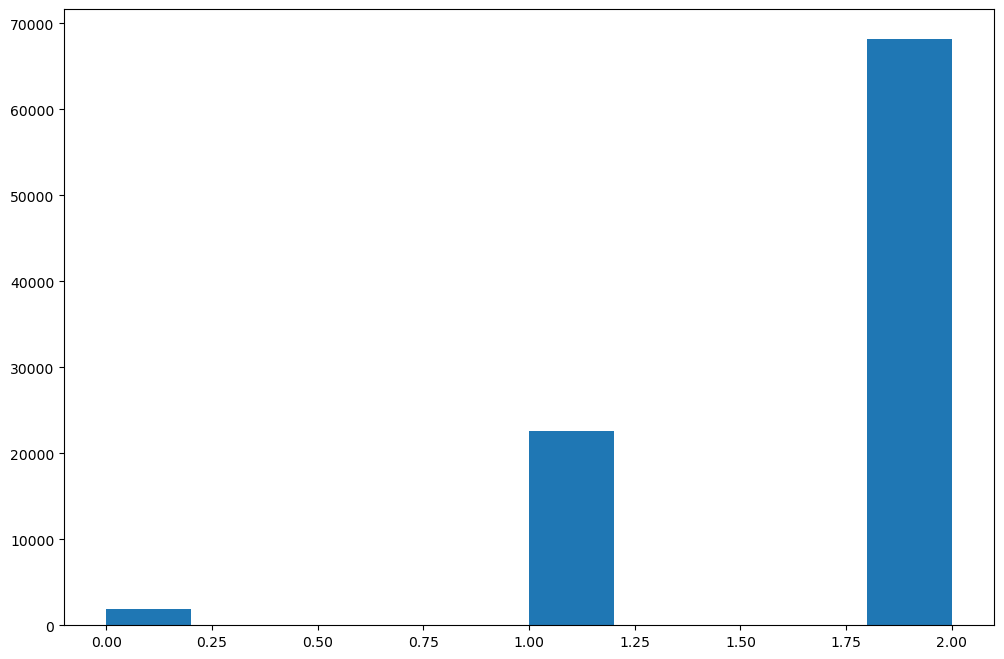

In [8]:
figure = plt.figure(figsize = (12, 8))
plt.hist(df_loans_raw["loan_status_numeric"])
plt.show()

##### Correlação entre colunas

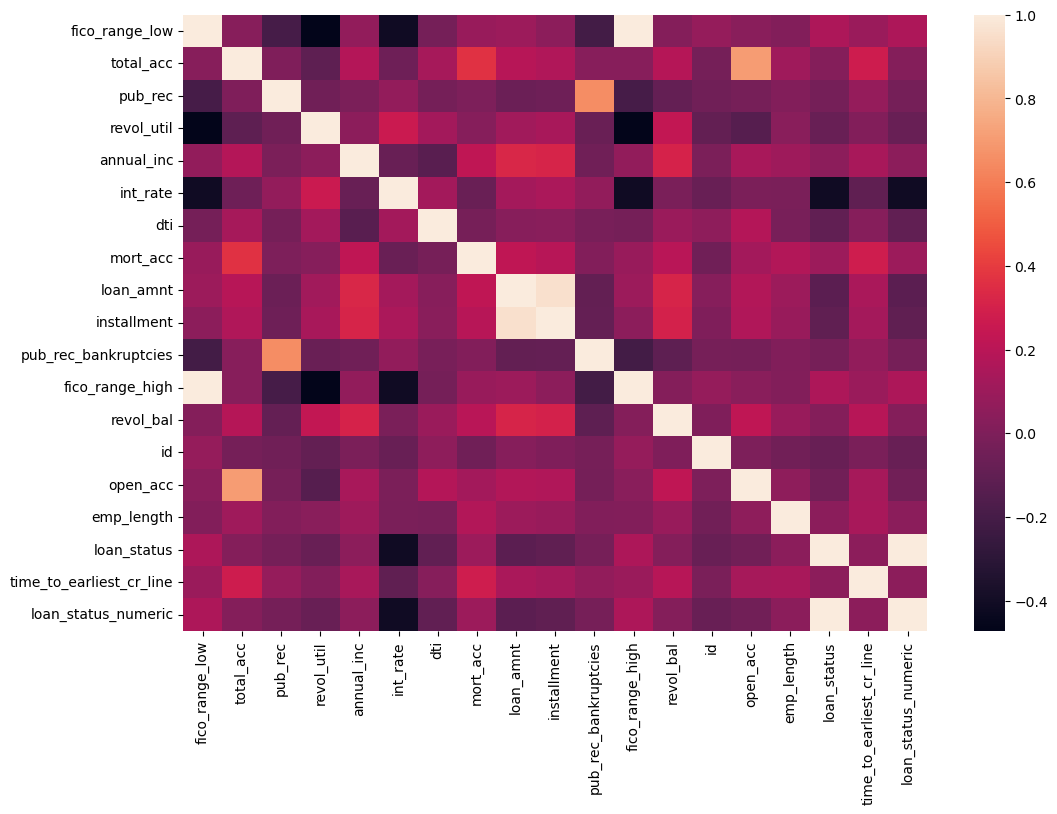

In [9]:
df_corr = df_loans_raw.select_dtypes(include = "number").corr()

figure = plt.figure(figsize = (12, 8))
sns.heatmap(df_corr)
plt.show()

### Preparando modelo

In [10]:
random_state = 45
df_class_2 = df_loans_raw[df_loans_raw["loan_status_numeric"] == 2] # este não precisa ser processado
df_class_1 = df_loans_raw[df_loans_raw["loan_status_numeric"] == 1]
df_class_0 = df_loans_raw[df_loans_raw["loan_status_numeric"] == 0]

df_minority_upsampled = resample(
    df_class_1, 
    replace = True,
    n_samples = df_class_2.shape[0],
    random_state = random_state
)

df_concat_1_2 = pd.concat([df_minority_upsampled, df_class_2])

df_minority_upsampled = resample(
    df_class_0, 
    replace = True,
    n_samples = df_class_2.shape[0],
    random_state = random_state
)

df_loans_processed = pd.concat([df_minority_upsampled, df_concat_1_2])
df_loans_processed["loan_status_numeric"].value_counts()

loan_status_numeric
0    68225
1    68225
2    68225
Name: count, dtype: int64

#### Salvando o dataset em outro arquivo

In [11]:
path_save_file = "./datasets/processed/"
file_name = "loans.pkl"
df_loans_processed.to_pickle(path_save_file + file_name)

#### Gerando novas colunas a partir da colunas *issue_d* e dropando a coluna *issue_d* ao final

In [12]:
df_loans_processed["issue_date_begin"] = df_loans_processed["issue_d"].str.slice(10, 21, 1)
df_loans_processed["issue_date_end"] = df_loans_processed["issue_d"].str.slice(0, 10, 1)
df_loans_processed.drop(columns = ["issue_d"], inplace = True)

#### Mudança dos tipos

#### Dropando coluna irrelevante repetida

In [13]:
# A LINHA ABAIXO SO DEVERA SER UTILIZADA
# EM CASO DE RUIDO CAUSADO PELA ALTA CORRELACAO
# ENTRE A COLUNA loan_amnt E
# A COLUNA installment
# df_loans_processed.drop(columns = ["loan_status_numeric", "fico_range_high", "loan_amnt"], inplace = True)
#
df_loans_processed.drop(columns = ["loan_status_numeric", "fico_range_high"], inplace = True)
df_loans_processed

,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,...,addr_state,initial_list_status,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,issue_date_begin,issue_date_end
66744,C5D1,60 months 60 months,MORTGAGERENT,1360.0,76.0,1.0,92.5,112000.0,31.61,49.92,...,TXPA,wf,24207.0,163542675.0,20.0,0.0,0.0,991440.0,2015-01-01,2017-11-01
31878,D2C4,60 months 36 months,MORTGAGERENT,1320.0,37.0,2.0,93.6,127345.0,32.48,59.86,...,RITN,ww,15233.0,118664195.0,19.0,20.0,0.0,549763.2,2014-07-01,2017-01-01
89710,B1E2,36 months 60 months,RENTMORTGAGE,1350.0,39.0,2.0,153.3,150000.0,27.83,39.12,...,DEMD,fw,24510.0,135047147.0,22.0,14.0,0.0,1238457.6,2015-04-01,2016-10-01
92701,C2E1,36 months 36 months,MORTGAGEMORTGAGE,1355.0,75.0,0.0,152.3,135000.0,31.84,32.31,...,ILVT,wf,54514.0,165954118.0,22.0,22.0,0.0,1409443.2,2015-05-01,2017-08-01
88652,B5F5,36 months 60 months,RENTRENT,1320.0,45.0,1.0,124.7,95500.0,37.06,35.42,...,COCT,wf,24504.0,141838061.0,39.0,4.0,0.0,384048.0,2015-04-01,2017-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92764,E4A2,60 months 36 months,MORTGAGEMORTGAGE,1425.0,66.0,1.0,46.8,109350.0,31.23,36.70,...,FLNY,wf,19060.0,134088638.0,40.0,11.0,2.0,1306972.8,2015-05-01,2016-07-01
92765,D1B1,36 months 36 months,MORTGAGEOWN,1355.0,31.0,0.0,128.9,166000.0,25.17,25.44,...,PAOH,wf,24001.0,151564963.0,15.0,17.0,2.0,1064880.0,2015-05-01,2017-03-01
92767,C1C1,60 months 36 months,MORTGAGEOWN,1380.0,28.0,1.0,102.7,98196.0,25.03,43.76,...,TNNY,ww,15446.0,153695875.0,19.0,16.0,2.0,809827.2,2015-05-01,2017-04-01
92769,E2A3,60 months 36 months,RENTMORTGAGE,1360.0,39.0,0.0,126.2,119000.0,30.77,26.52,...,CATX,wf,13205.0,167883360.0,14.0,4.0,2.0,894067.2,2015-05-01,2017-09-01


In [14]:
print("Lista de nomes das colunas:\n", df_loans_processed.dtypes, "\n\nTamanho:", len(df_loans_processed.columns))

Lista de nomes das colunas:
 sub_grade                    object
term                         object
home_ownership               object
fico_range_low              float64
total_acc                   float64
pub_rec                     float64
revol_util                  float64
annual_inc                  float64
int_rate                    float64
dti                         float64
purpose                      object
mort_acc                    float64
loan_amnt                   float64
application_type             object
installment                 float64
verification_status          object
pub_rec_bankruptcies        float64
addr_state                   object
initial_list_status          object
revol_bal                   float64
id                          float64
open_acc                    float64
emp_length                  float64
loan_status                 float64
time_to_earliest_cr_line    float64
issue_date_begin             object
issue_date_end               object

##### Tipos variados para tipo *category*

In [15]:
df_loans_processed["id"] = df_loans_processed["id"].astype("category")
df_loans_processed["pub_rec"] = df_loans_processed["pub_rec"].astype("category")
df_loans_processed["sub_grade"] = df_loans_processed["sub_grade"].astype("category")
df_loans_processed["term"] = df_loans_processed["term"].astype("category")
df_loans_processed["home_ownership"] = df_loans_processed["home_ownership"].astype("category")
df_loans_processed["purpose"] = df_loans_processed["purpose"].astype("category")
df_loans_processed["application_type"] = df_loans_processed["application_type"].astype("category")
df_loans_processed["verification_status"] = df_loans_processed["verification_status"].astype("category")
df_loans_processed["addr_state"] = df_loans_processed["addr_state"].astype("category")
df_loans_processed["pub_rec_bankruptcies"] = df_loans_processed["pub_rec_bankruptcies"].astype("category")
df_loans_processed["initial_list_status"] = df_loans_processed["initial_list_status"].astype("category")
df_loans_processed["issue_date_begin"] = df_loans_processed["issue_date_begin"].astype("category")
df_loans_processed["issue_date_end"] = df_loans_processed["issue_date_end"].astype("category")
df_loans_processed["loan_status"] = df_loans_processed["loan_status"].astype("category")

##### Tipos numéricos

In [16]:
df_loans_processed["total_acc"] = df_loans_processed["total_acc"].astype("uint16")
df_loans_processed["mort_acc"] = df_loans_processed["mort_acc"].astype("uint8")
df_loans_processed["revol_bal"] = df_loans_processed["revol_bal"].astype("uint32")
df_loans_processed["open_acc"] = df_loans_processed["open_acc"].astype("uint8")
df_loans_processed["emp_length"] = df_loans_processed["emp_length"].astype("uint8")

In [17]:
df_loans_processed["fico_range_low"] = df_loans_processed["fico_range_low"].astype("float32")
df_loans_processed["revol_util"] = df_loans_processed["revol_util"].astype("float32")
df_loans_processed["annual_inc"] = df_loans_processed["annual_inc"].astype("float64")
df_loans_processed["int_rate"] = df_loans_processed["int_rate"].astype("float32")
df_loans_processed["dti"] = df_loans_processed["dti"].astype("float32")
df_loans_processed["loan_amnt"] = df_loans_processed["loan_amnt"].astype("float64")
df_loans_processed["installment"] = df_loans_processed["installment"].astype("float32")
df_loans_processed["time_to_earliest_cr_line"] = df_loans_processed["time_to_earliest_cr_line"].astype("float64")

##### Tipo datetime

In [18]:
df_loans_processed["issue_date_begin"] = pd.to_datetime(df_loans_processed["issue_date_begin"])
df_loans_processed["issue_date_end"] = pd.to_datetime(df_loans_processed["issue_date_end"])

##### Salvando o dataset atual

In [19]:
path_save_file = "./datasets/processed/"
file_name = "loans.pkl"
df_loans_processed.to_pickle(path_save_file + file_name)

### Gerando o modelo utilizando o RandomForestClassifier

In [20]:
test_size = 0.4
random_state = 45

#### Dados balanceados

In [21]:
X_processed = df_loans_processed.drop(columns = ["loan_status"]).select_dtypes(include = np.number)
y_processed = df_loans_processed["loan_status"]

x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed, y_processed, test_size = test_size, random_state = random_state)

In [22]:
random_forest_balanced = RandomForestClassifier()
random_forest_balanced.fit(x_train_processed, y_train_processed)

RandomForestClassifier()

In [26]:
y_predicted_processed = random_forest_balanced.predict(x_test_processed)
accuracy = accuracy_score(y_test_processed, y_predicted_processed)
print("Acurácia:", accuracy)

Acurácia: 0.9210211310614389


#### Dados desbalanceados

In [27]:
X_raw = df_loans_raw.drop(columns = ["loan_status"]).select_dtypes(include = np.number)
y_raw = df_loans_raw["loan_status"]

x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size = test_size, random_state = random_state)

In [28]:
random_forest_unbalanced = RandomForestClassifier()
random_forest_unbalanced.fit(x_train_raw, y_train_raw)

RandomForestClassifier()

In [29]:
y_predicted_raw = random_forest_unbalanced.predict(x_test_raw)
accuracy = accuracy_score(y_test_raw, y_predicted_raw)
print("Acurácia:", accuracy)

Acurácia: 1.0
